## Hands-on 1 [Working with Audio]

created by : Arsydana Estu Aziz (121140068)

_Well, kinda late to the party, but shall let's move on._

Pada _hands-on_ kali ini terdapat 5 jenis audio yang berbeda, dan akan dilakukan proses analis spektogram dan analisis audio. 

### Audio Description
Pada folder `attachment` terdapat beberapa file
- `audio-low` yang merupakan sebuah audio bervolume rendah
- `audio-medium` yang merupakan sebuah audio bervolume medium (suara normal)
- `audio-high` yang merupakan sebuah audio bervolume tinggi
- `audio-ess` suara `esssss` yang direkam pada volume medium
- `audio-brbrt` suara bibir `brbrbr`.

## Task Description
Pada kesempatan kali, saya akan menjelaskan tentang analisis wave dan spektogram pada 5 sample audio berikut. 
## System pre-requirement
Analisis ini dilakukan pada `VSCode` dengan `Conda` environment sebagai package manager, dan kita akan melakukan proeses installasi 

In [52]:
## You should install the pacakge with pip install <package> 
## and use it here

import matplotlib.pyplot as plt
import numpy as np
import os
import wave

## Loading Audio File
Pada kasus ini akan dibuka satu file dan kita akan melakukan proses pembedahan gelombang dan spektogram terlebih dahulu sebelum analisis ke-5 filenya.

Kita bisa membuka file dengan package `wave`

In [53]:
file_path = os.path.join(os.getcwd(), "attachment", "audio2-medium-volume.wav")

if not os.path.exists(file_path):
    print(f"File {file_path} is not existed, you choose the wrong files fellas")
    exit()

with wave.open(file_path, "r") as files:
    audio_frames = files.readframes(-1)
    sound_data = np.frombuffer(audio_frames, dtype="int16")
    sampling_rates = files.getframerate()
    n_channels = files.getnchannels()

## Printing the content of the audio
print(f"Content of the sound_data: {sound_data}")
print(f"Length of the sound_data: {len(sound_data)}")
print(f"Sampling rate: {sampling_rates}")
print(f"Jumlah channel: {n_channels}")

Content of the sound_data: [0 0 0 ... 0 0 0]
Length of the sound_data: 234260
Sampling rate: 44100
Jumlah channel: 1


## Description

Secara sederhana, `code` ini akan digunakan untuk membuka file audio dan melihat bagaimana properti dari audio tersebut.
- `audio_frames` merupakan perintah untuk membaca semua frames dalam satu file tersebut, sehingga kita menggunakan `-1` sebagai argument dari method tersebut. 
- `sound_data` merupakan sebuah perintah untuk mengambil nilai tersebut dan melakukan koversi menjadi tipe data `int16` (sebuah tipe data yang memiliki rentang $(-\frac{2^{15}}{2}) sampai (+\frac{2^{15} - 1}{2})$ yang kita gunakan sebagai `bit-depth`).
- `sampling_rates` disini merupakan jumlah sampling rate (merupakan jumlah nilai per detik / frekuensi (biasanya dalam satuan `Hertz (Hz)`)), disini kita menggunakan nilai 44100. 

    Kenapa 44100? Karena teorema `Nyquist` yang menyatakan bahwa, karena batas pendengaran manusia terletak pada interval `20` - `20000` Hz, maka untuk menghasilkan sebuah sinyal yang halus pada suara berikut, diperlukan minimal 2 kali minimum frequensi (20000 hz sebagai upper limit pendengaran manusia). Kalian bisa membaca artikel ini untuk info [detailnya](https://www.techtarget.com/whatis/definition/Nyquist-Theorem#:~:text=It%20is%20the%20principle%20to,and%20video%20to%20reduce%20aliasing.) (Koreksi pada point ini jika saya salah dalam analisis).

- `n_channels` merupakan angka berapa channel pada audio tersebut, biasanya ada 2 `mono` (single channel) dan `stereo` (dual channel), hal ini berdampak bagaimana nilai audio tersebut disimpan dan dan bagaimana cara kita memprosesnya nanti.

## Visualisasi Audio

Selanjutnya kita akan melakukan proses visualisasi audio sederhana pada satu sampel terlebih dahulu.

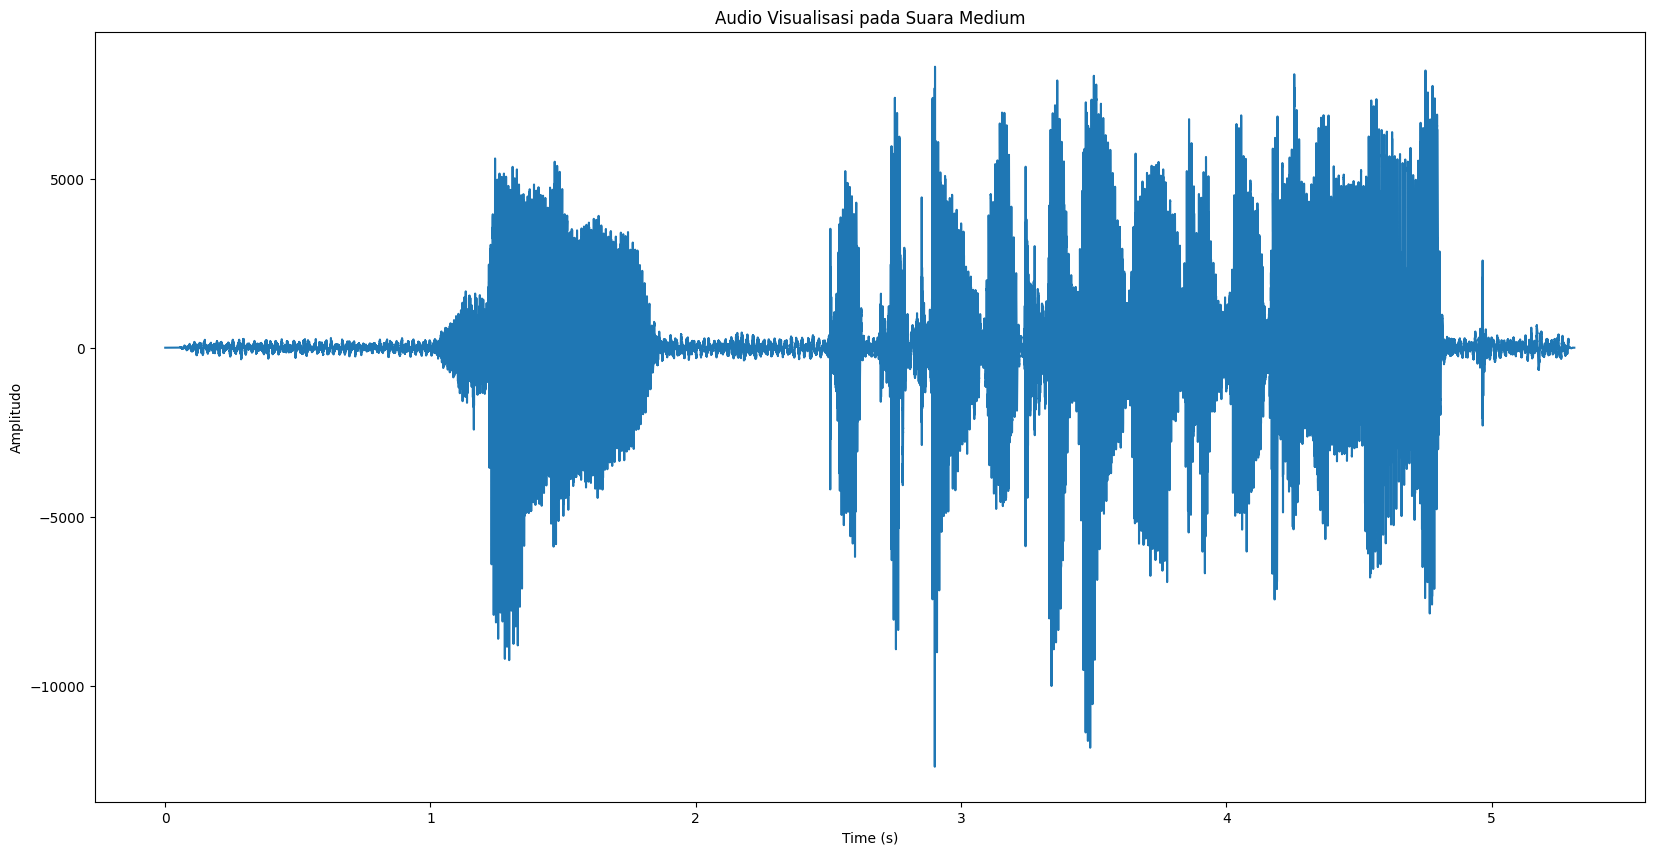

In [54]:
time_axis = np.linspace(0, len(sound_data) / sampling_rates, num=len(sound_data))

plt.figure(figsize=(20, 10))
plt.title("Audio Visualisasi pada Suara Medium")
plt.plot(time_axis, sound_data)
plt.xlabel("Time (s)")
plt.ylabel("Amplitudo")
plt.show()

## Description
You probably wondering what is this also both for the code and for the graph. let's break it down

Kita mencatat time_interval dari audio berikut dengan cara sederhana, ingat bahwasannya `time_axis` ini satuannya unit sampling, bukan detik.
$$
    \text{time length} = \frac{\text{length of sound data (samples)}}{\text{sampling rates}}
$$

Maka jika ingin mendapatkan properti audio pada detik ke-n, Tinggal di kali saja, sampling rates dengan time lengthnya.

Disini, kita menggunakan `matpotlib` sebagai package untuk menggambar grafik dari fungsi gelombang suara kali ini. 

Data pada detik ke-1 sampai 1.05


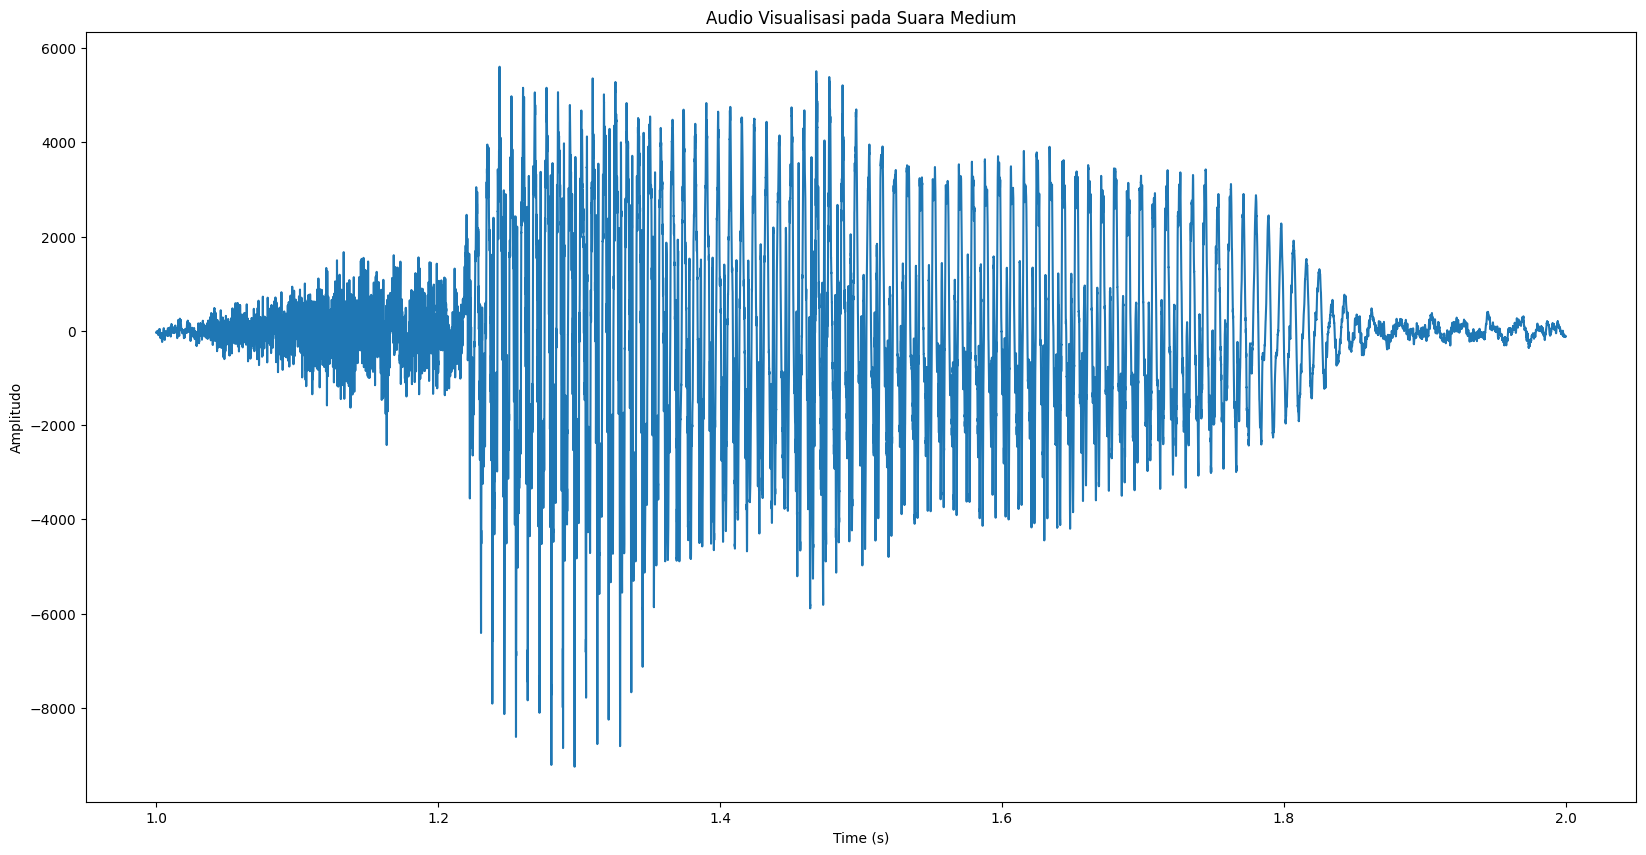

In [55]:
print("Data pada detik ke-1 sampai 1.05")
plt.figure(figsize=(20, 10))
plt.title("Audio Visualisasi pada Suara Medium")

## Representative audio pada detik ke 1 = 1 * 44100 dan detik ke 2 = 2 * 44100 = 88200
plt.plot(time_axis[44100:88200], sound_data[44100:88200]) 
plt.xlabel("Time (s)")
plt.ylabel("Amplitudo")
plt.show()

Anda pasti berfikir, apa maskud masing-masing nilai pada grafik satu ini, di satu sisi bernilai positif dan negatif. Sederhannaya, nilai tersebut adalah nilai tekanan di udara yang sudah di konversi list bilangan melalui ADC (Analog to Digital Converter).

Kalian juga pasti berfikir, apa hubungannya tekanan udara dalam proses pemrosesan audio secara digital? Cukup contrast dengan pemrosesan citra, dimana kita menggunakan nilai `uint8` (0 - 255) sebagai nilai untuk warna RGB. Untuk pemrosesan audio sendiri, nilai ini nanti akan digunakan sebagai arus listrik untuk menentukan bagaimana suara tersebut di buat oleh speaker / earphone yang kalian pakai (nilai negatif / positif merupakan nilai tekanan / refaksi pada speaker kalian untuk membuat sebuah suara). (This is the best explanation that I can come up with)

Lalu, amplitudo sendiri merupakan satuan yang menentukan kurang lebih kerasnya suara. Semakin jauh sebuah nilai dari titik `equilibrium` (0) maka suara tersebut akan semakin besar.

Lihat hasil saya riset saya [disini](https://chatgpt.com/share/66ffc503-4450-8007-9942-d6300efd99a3)

## Penggunaan Mel Spectogram

Spectogram merupkaan sebuah alat untuk melihat representasi visual dari spektrum frekuensi audio, kita menggunakan spectogram agar lebih mudah dipahami oleh manusia. Kita dapat menggunakana library `librosa` untuk dapat membuat Mel Spektogram

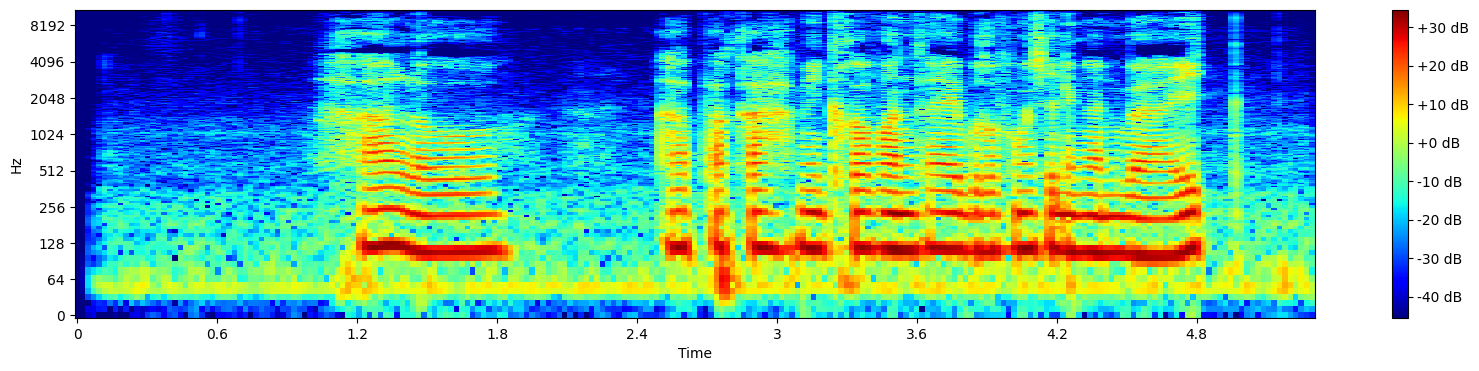

In [56]:
import librosa
import librosa.display

file_path = os.path.join(os.getcwd(), "attachment", "audio2-medium-volume.wav")

data_audio, sr = librosa.load(file_path)
S = librosa.stft(data_audio)
S_db = librosa.amplitude_to_db(np.abs(S))

plt.figure(figsize=(20, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='jet')
plt.colorbar(format='%+2.0f dB')
plt.show()

## Description
Pada Mel spectrogram:
- **Sumbu X**: Menunjukkan waktu.
- **Sumbu Y**: Menunjukkan frekuensi dalam skala Mel.
- **Warna**: Menunjukkan amplitudo atau kekuatan sinyal pada frekuensi dan waktu tertentu, diukur dalam dB (decibel).

Mel spektogram memberikan representasi yang lebih jelas mengenani spektrum didistribusikan sesuai dengan pendengaran manusia, Ini cukup membantu untuk menganalisis pola suara dan nada.

Bisa dilihat pada spektogram ini, terdapat spot merah yang menandakan bahwa teredapat bagian suara dengan volume yang besar.

## Hands-on Overview
Pada bagian kali ini akan dilakukan proses analisis pada 5 suara berikut dengan menggunakan waveforms dan spectogram untuk melakukan proses analisis.

### Analisis Suara dengan Waveforms
Pada kasus ini kita akan menggunakan waveforms untuk melihat gelombang suara pada 5 sampel yang berbeda.

In [57]:
## Create a method to handle read files and show graph, because why not

def read_wav(file_path):
    with wave.open(file_path, 'rb') as wav_file:
        # Get the parameters from the file (e.g., frame rate, number of frames)
        n_channels = wav_file.getnchannels()
        sample_width = wav_file.getsampwidth()
        frame_rate = wav_file.getframerate()
        n_frames = wav_file.getnframes()
        
        # Read frames as a byte string and convert to an array
        frames = wav_file.readframes(n_frames)
        audio_data = np.frombuffer(frames, dtype=np.int16)
        
        # If the audio is stereo, we need to reshape the array to separate the channels
        if n_channels == 2:
            audio_data = audio_data.reshape((-1, 2))
        
        return frame_rate, audio_data

def plot_waveform(file_path, frame_rate, audio_data):
    # Create a time array for x-axis based on the frame rate
    time = np.linspace(0, len(audio_data) / frame_rate, num=len(audio_data))
    
    # Plot the audio data
    plt.figure(figsize=(10, 4))
    plt.plot(time, audio_data)
    plt.title(f'Waveform of {file_path}')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()


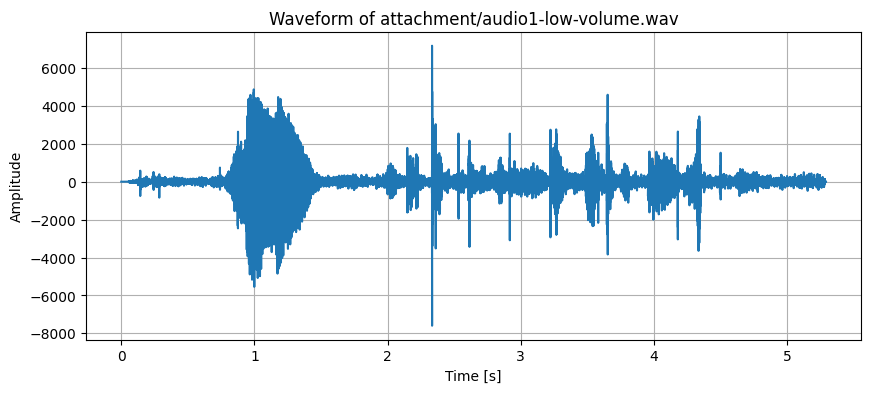

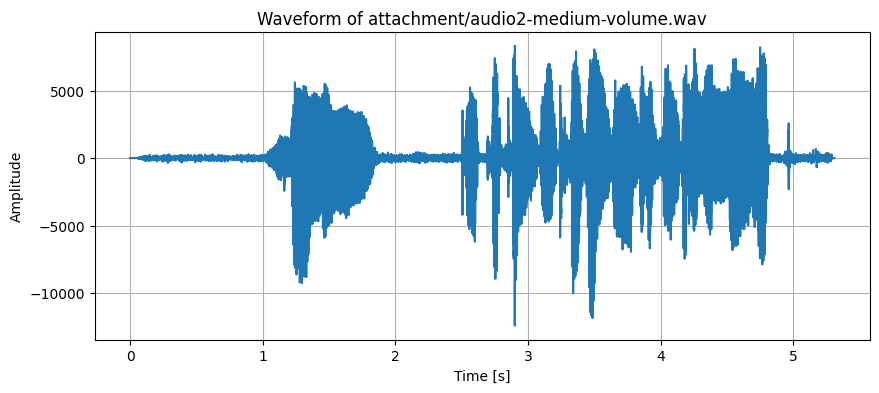

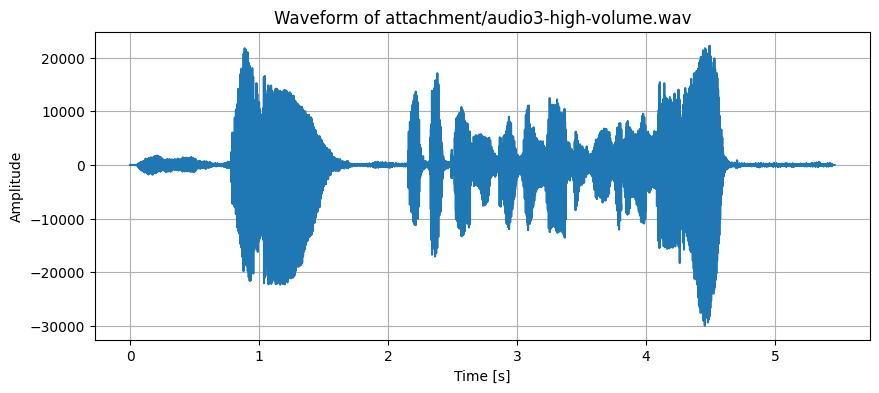

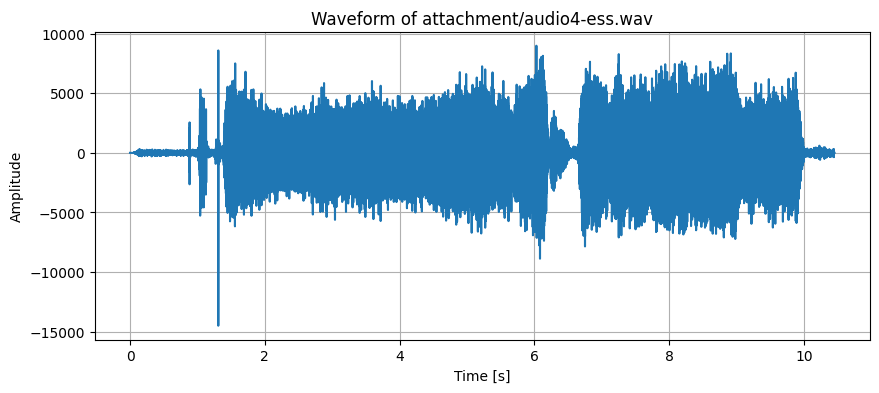

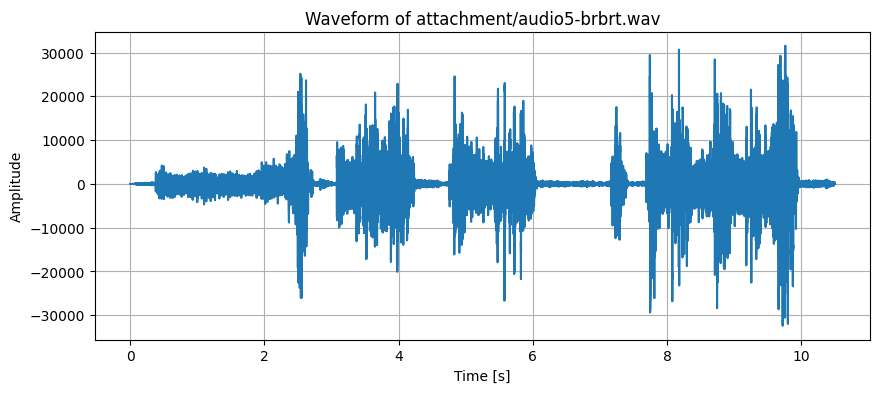

In [58]:
## Set filename
files = ["attachment/audio1-low-volume.wav", "attachment/audio2-medium-volume.wav", "attachment/audio3-high-volume.wav", "attachment/audio4-ess.wav", "attachment/audio5-brbrt.wav"]

for file in files:
    frame_rate, audio_data = read_wav(file)
    plot_waveform(file, frame_rate, audio_data)

### Analisis Graph
Berdasarkan hasil grafik ke-5 file audio tersebut, di dapat kan beberapa kesimpulan.
- `Amplitudo` adalah salah satu cara untuk mengetahui intensitas suara (seberapa keras sebuah suara), maka semakin tinggi amplitudonya, maka semakin besar juga volume suara yang dihasilkan, bisa dilihat nilai yang cukup kontrast dari `audio1` dan `audio3` dari sisi Amplitudonya.
- Untuk kasus sampel 4 dan 5, dimana seharusnya saya bisa mendapatkan suara lip trail yang konsisten (saya tidak bisa). didapatkan bahwa untuk kedua grafik tersebut, gelombang yang dilihat cukup padat yang menandakan `frekuensi` dari kedua audio tersebut sangat tinggi (frekuensi disini berati jumlah gelombang dalam satu detik (`Hertz`)). 
- Amplitudo dan Frekuensi adalah hal yang saling berbeda dimana Amplitudo bertugas dalam keras / lembutnya suara, sedangkan Frekuensi bertugas dalam tinggi / rendahnya suara (pitch). But again, I maybe wrong about this. 

## Analisis Spectogram
Waveforms cukup bagus dalam membaca properti amplitudo, namun spectogram lebih baik lagi karena bisa membaca properti dari frekuensi dari sebuah audio. 

In [59]:
def plot_spectrogram(file, audio, sr):
    S = librosa.stft(audio)
    spect_db = librosa.amplitude_to_db(np.abs(S))
    
    plt.figure(figsize=(10, 5))
    plt.title(f"Spectogram of {file}")
    librosa.display.specshow(spect_db, sr=sr, x_axis='time', y_axis='log', cmap="jet")
    plt.colorbar(format='%+2.0f dB')
    plt.show()


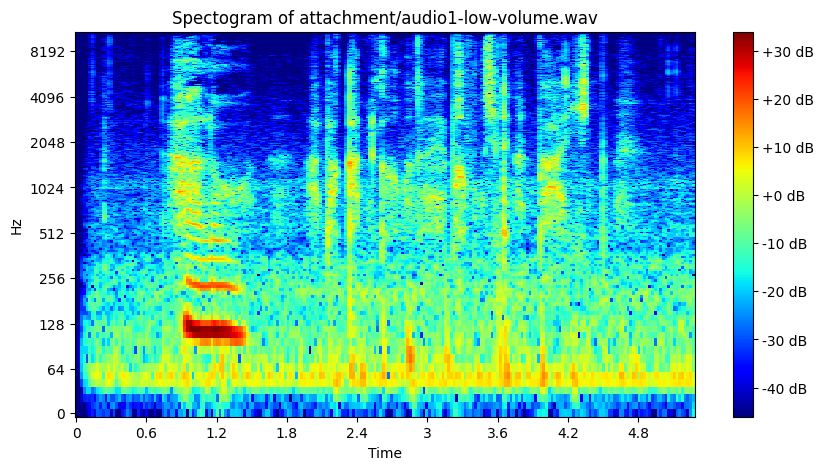

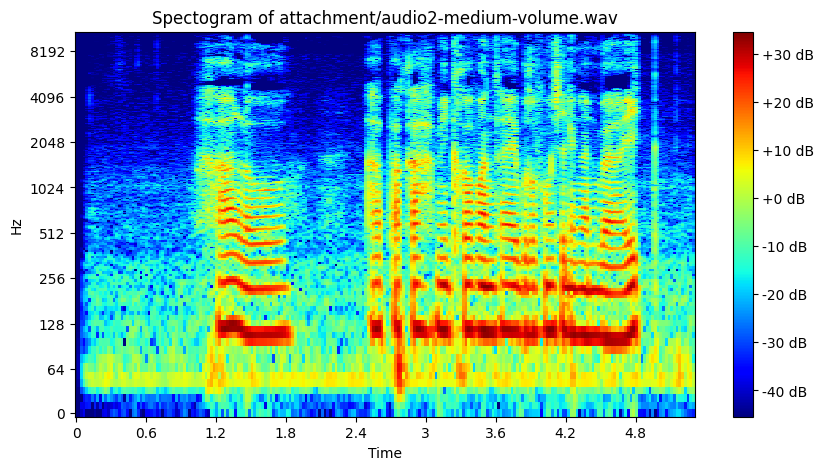

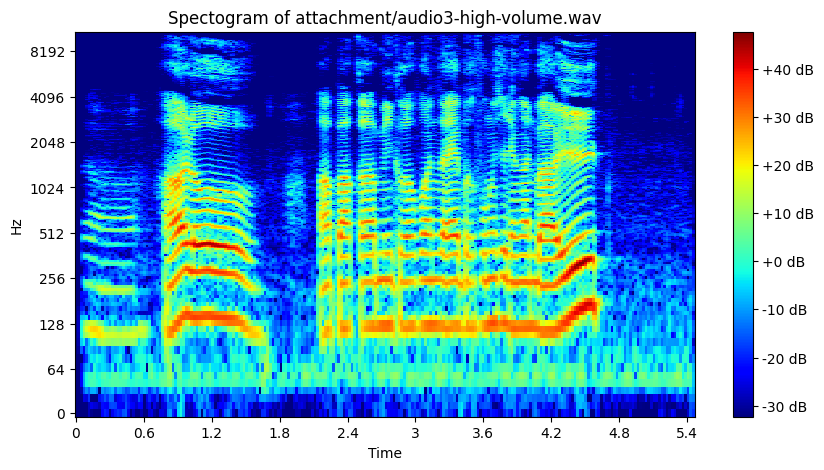

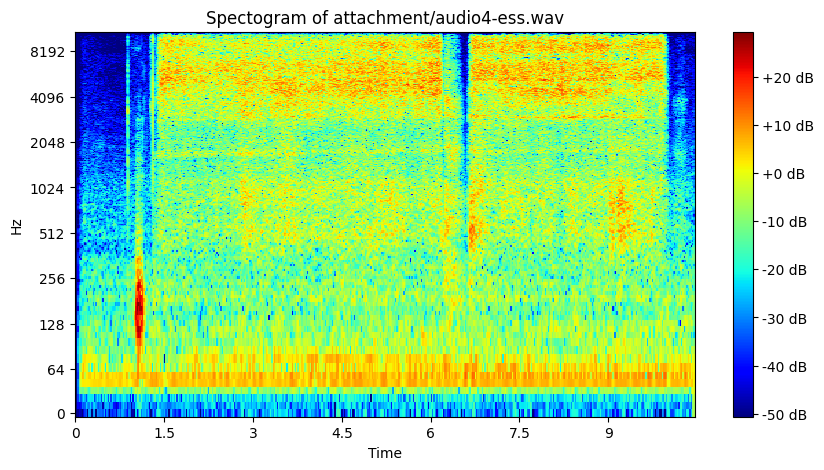

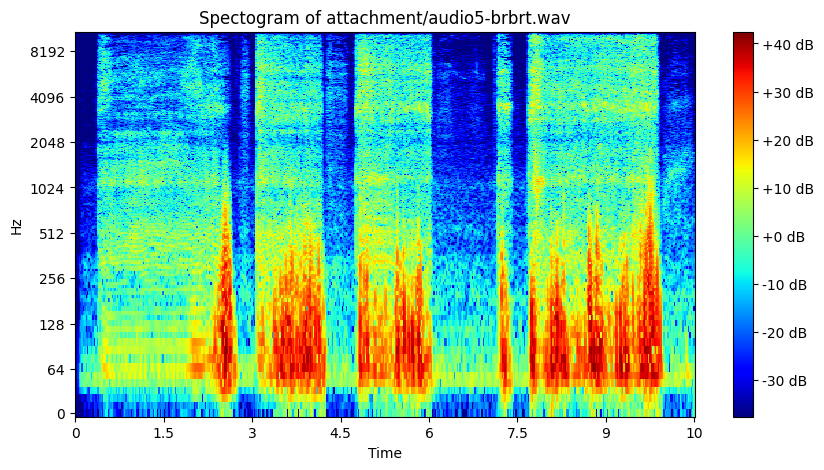

In [60]:
files = ["attachment/audio1-low-volume.wav", "attachment/audio2-medium-volume.wav", "attachment/audio3-high-volume.wav", "attachment/audio4-ess.wav", "attachment/audio5-brbrt.wav"]

for file in files:
    audio, sr = librosa.load(file)
    plot_spectrogram(file, audio, sr)


## Analisis Spectogram
- Untuk kasus sampel 4 dan 5, dapat dilihat pada tabel Spectogram ini dimana terdapat frekuensi yang tinggi pada kedua sampel berikut, untuk kasus 4 dan 5 dapat terjadi karena sifat alami dari bunyi `esss` dan `brrt` yang merupakan [fricative sounds](https://thesoundofenglish.org/fricative-consonants/#:~:text=The%20fricative%20sounds%20%2Fv%2C%C3%B0,voiceless%3B%20produced%20only%20with%20air) menghasilkan suara dengan frekuensi (pitch) yang tinggi.
Lalu apakah frekuensi yang tinggi berkorelasi dengan suara (volume) yang besar? Jawabannya tentu tidak, kedua hal tersebut saling bersebelahan dan mempunyai tugasnya masing-masing [ref](https://g.co/gemini/share/605be3f7e56a).

## Fading Exponential
_Exponential Fading_ adalah sebuah tipe dari _fading_ yang diaplikasikan ke dalam sebuah sinyal audio, dimana keras / lemah nya suara perlahan menurun (atau menaik) mengikuti dalam kurva eksponen, untuk menciptakan sebuah efek yang lebih mulus dibandingkan dengna liner fading.

### Fade-In && Fade-Out 101
Aplikasi dalam hal ini adalah dapat ditemukan dalam sebuah fade-in dan fade-out dari sebuah lagu.

#### Fade in
Efek yang dihasilkan dengan lemahnya suara, lalu berakselerasi semakin cepat mendekati amplitudo dari target.
Biasanya di definiskan dengan rumus matetika sebagai berikut
$$
\text{Fade-in} : A(t) = A_0 \cdot (1 - e^{-\lambda t})
$$

#### Fade out
Berkebalikan dengan fade-in, amplitudo dari sebuah lagu akan perlahan melemah dan mencapai titik 0.
Biasanya di definiskan dengan rumus matetika sebagai berikut
$$
\text{Fade-out} : A(t) = A_0 \cdot e^{-\lambda t}
$$

Persepsi: Fading eksponensial cenderung terasa lebih alami di telinga manusia. Hal ini karena pendengaran kita lebih merespons perubahan relatif dalam volume (seperti halnya kita merasakan desibel). Fade-out dimulai secara bertahap dan semakin cepat, membuatnya terasa halus, sedangkan fade-in dimulai dengan lambat dan menjadi lebih menonjol.


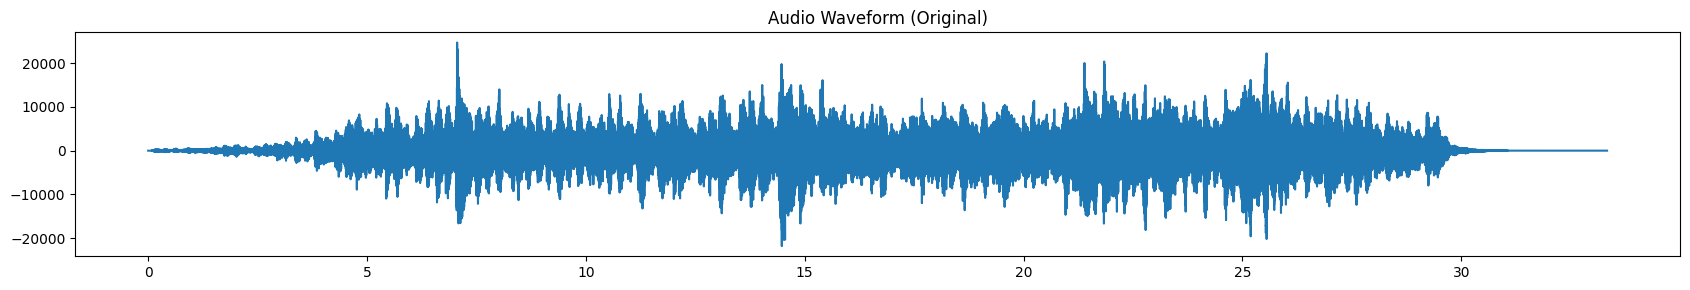

Exponential fade-in and fade-out applied successfully!


In [61]:
import wave
import numpy as np

# Function to apply exponential fade-in and fade-out
def apply_exponential_fade(audio_data, sample_rate, fade_in_duration, fade_out_duration):
    # Total number of samples
    num_samples = len(audio_data)

    # Number of samples to apply fade-in and fade-out
    fade_in_samples = int(sample_rate * fade_in_duration)
    fade_out_samples = int(sample_rate * fade_out_duration)

    # Exponential fade-in curve
    fade_in_curve = np.exp(np.linspace(-4, 0, fade_in_samples))

    # Exponential fade-out curve
    fade_out_curve = np.exp(np.linspace(0, -4, fade_out_samples))

    # Apply fade-in to the beginning of the audio
    audio_data[:fade_in_samples] *= fade_in_curve

    # Apply fade-out to the end of the audio
    audio_data[-fade_out_samples:] *= fade_out_curve

    return audio_data

save_path = os.path.join(os.getcwd(), "attachment", "strings.wav")

if not os.path.exists(file_path):
    print(f"File {file_path} is not existed, you choose the wrong files fellas")
    exit()

# Open the WAV file
with wave.open(save_path, 'rb') as wav_file:
    # Extract audio properties
    sample_rate = wav_file.getframerate()
    num_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    num_frames = wav_file.getnframes()


    # Read the audio data
    audio_data = np.frombuffer(wav_file.readframes(num_frames), dtype=np.int16)

# Convert audio data to float for processing
audio_data = audio_data.astype(np.float32)

# Define fade durations (in seconds)
fade_in_duration = 5.0  # 2 seconds fade-in
fade_out_duration = 5.0  # 2 seconds fade-out

# Apply exponential fade-in and fade-out
faded_audio = apply_exponential_fade(audio_data, sample_rate, fade_in_duration, fade_out_duration)

# Convert audio data back to int16
faded_audio = np.int16(faded_audio)

time_axis = np.linspace(0, num_frames/sample_rate, num_frames)

plt.figure(figsize=(17, 3))
plt.plot(time_axis, faded_audio)
plt.title('Audio Waveform (Original)')
plt.tight_layout()
plt.show()

save_path = os.path.join(os.getcwd(), "attachment", "output_faded.wav")

# Write the modified audio back to a new WAV file
with wave.open(save_path, 'wb') as wav_file:
    wav_file.setnchannels(1)  # Mono
    wav_file.setsampwidth(sample_width)
    wav_file.setframerate(sample_rate)
    wav_file.writeframes(faded_audio.tobytes())

print("Exponential fade-in and fade-out applied successfully!")


[Ref](https://chatgpt.com/share/66ffc60c-bca0-800c-bbef-2c4240851b02)

## LUFS Comparison

Dengan menggunkan file audio `audio2-medium-volume.wav`, akan dilakukan proses kompresi dan normalisasi hingga louness dari LUFS menjad -14 LUFS.

Step 1: Buka File dan Dapatkan Propertinya

Channels: 1, Frame rate: 44100, Frames: [0 0 0 ... 0 0 0]


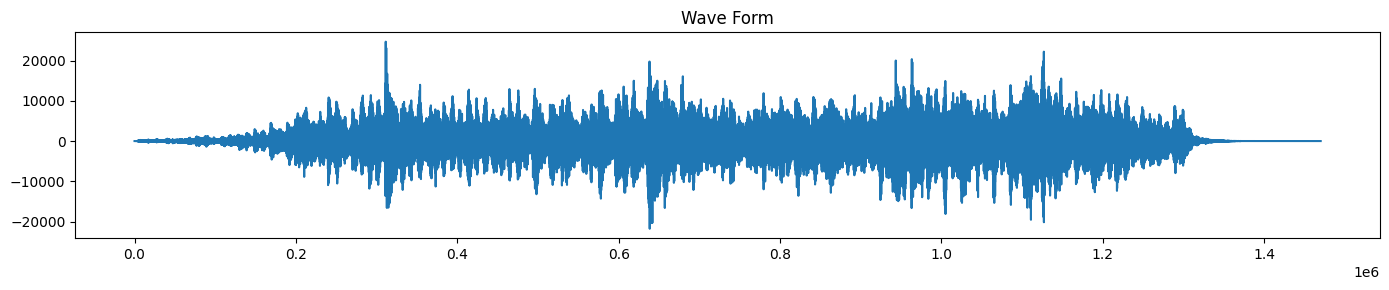

In [62]:
save_path = os.path.join(os.getcwd(), "attachment", "audio2-medium-volume.wav")

if not os.path.exists(file_path):
    print(f"File {file_path} is not existed, you choose the wrong files fellas")
    exit()

with wave.open(file_path, "r") as files:
    audio_frames = files.readframes(-1)
    sound_data = np.frombuffer(audio_frames, dtype="int16")
    sampling_rates = files.getframerate()
    n_channels = files.getnchannels()
    n_samples = files.getnframes()

print(f"Channels: {n_channels}, Frame rate: {sample_rate}, Frames: {sound_data}")

plt.figure(figsize=(14, 3))
plt.plot(audio_data)
plt.title('Wave Form')
plt.tight_layout()
plt.show()


Step 2: Proses Compresi

Untuk melakukan hal ini, diperlukan sebuah nilai maximum dari `audio` tersebut, lalu membuat `threshold` ambang batas kompresi. 


In [63]:
## Getting the Max value and the Threshold
max_val = np.max(np.abs(audio_data))
print(f"Max value: {max_val}")

threshold = 0.4 * max_val
print(f"Threshold: {threshold}")

## Duplicate the real audio
compressed_audio_duplicate = audio_data.copy()

Max value: 24686.0
Threshold: 9874.400000000001


Step 2.1: Proses Pembuatan Masking dan Kompresi

Pada tahap ini akan dilakukan proses pembuatan masking dan mengurangi level suara yang melebihi threshold value dalam amplitudo (filter the higher amp value)

Jumlah sampel yang harus dikompres: 11525


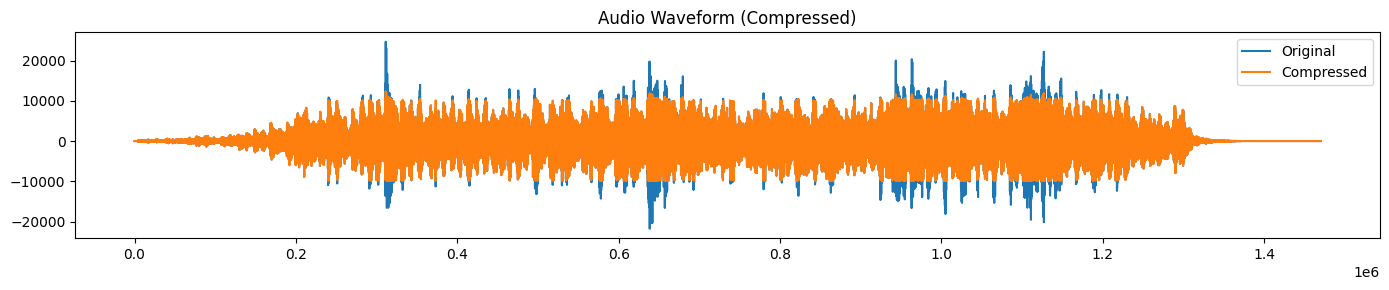

In [64]:
above_threshold = np.abs(compressed_audio_duplicate) > threshold
print(f"Jumlah sampel yang harus dikompres: {np.sum(above_threshold)}")

## Setting the ratio
ratio = 6

compressed_audio_duplicate[above_threshold] = threshold + (np.abs(compressed_audio_duplicate[above_threshold]) - threshold) / ratio
compressed_audio_duplicate = np.clip(compressed_audio_duplicate, -max_val, max_val)

## Preview the Code
plt.figure(figsize=(14, 3))
plt.plot(audio_data, label='Original')
plt.plot(compressed_audio_duplicate, label='Compressed')
plt.title('Audio Waveform (Compressed)')
plt.tight_layout()
plt.legend()
plt.show()



Step 5: Up the Overall level of the Audio

Supaya memiliki level yang sama, perlu dilakukan proses penaikan level, Kita akan melakukan semacam normalisasi disini.

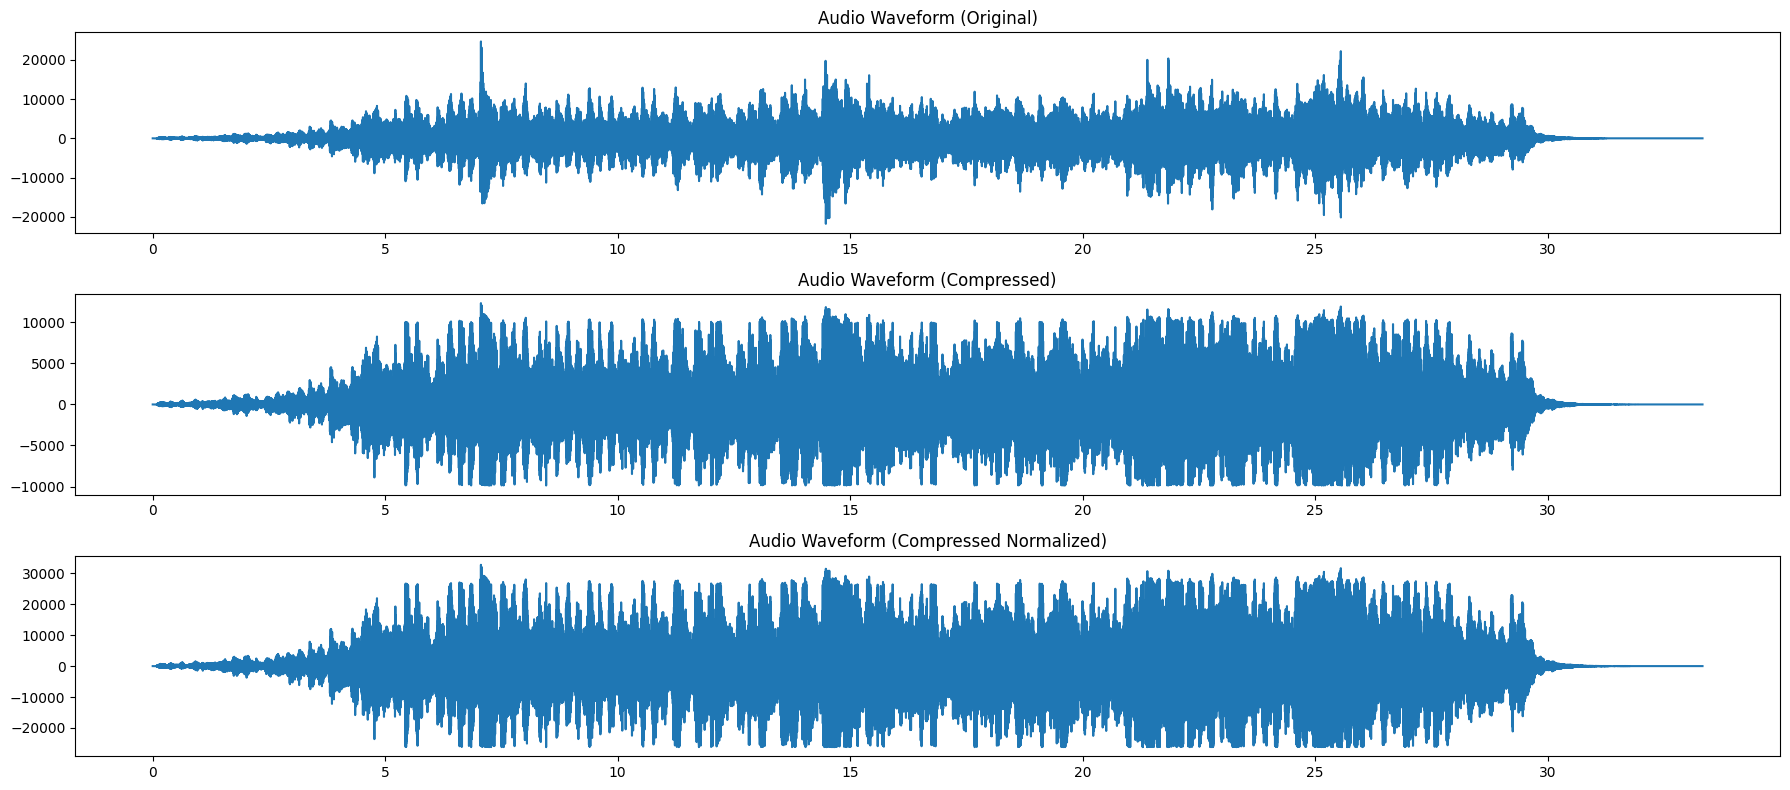

In [65]:
nilai_max = np.max(np.abs(compressed_audio_duplicate))
normalized_compresed_audio = compressed_audio_duplicate / nilai_max * 32767 # As for the 16-bit depth
normalized_compresed_audio = normalized_compresed_audio.astype(np.int16)

ax, fig = plt.subplots(3, 1, figsize=(18, 8))
fig[0].plot(time_axis, audio_data, label='Original')
fig[0].set_title('Audio Waveform (Original)')
fig[1].plot(time_axis, compressed_audio_duplicate, label='Compressed')
fig[1].set_title('Audio Waveform (Compressed)')
fig[2].plot(time_axis, normalized_compresed_audio, label='Compressed Normalized')
fig[2].set_title('Audio Waveform (Compressed Normalized)')
plt.tight_layout()
plt.show()

Step 6: Check LUFS 

Karena audio sudah di kompress dan di normalisasi, sudah saatnya di cek kerasnya suara dengan LUFS, disini kita menggunanan IIR Filtering (Infinite Impulse Response). Hal pertama yang kita lakukan adalah dengan membuat sebuah koefisien filter dan menghitung data audio yang telah di proses

In [66]:
b = np.array([1.53512485958697, -2.69169618940638, 1.19839281085285])
a = np.array([1.0, -1.69065929318241, 0.73248077421585])

## Calculate the Audio data
audio_data_float = audio_data.astype(np.float32) / np.iinfo(np.int16).max
filtered_audio = np.zeros_like(audio_data_float)
for i in range(len(audio_data_float)):
    if i < 2:
        filtered_audio[i] = audio_data_float[i]
    else :
        filtered_audio[i] = (b[0] * audio_data_float[i] + 
                         b[1] * audio_data_float[i - 1] + 
                         b[2] * audio_data_float[i - 2] -
                         a[1] * filtered_audio[i - 1] - 
                         a[2] * filtered_audio[i - 2])

## Calculate the LUFS
ms = np.mean(np.square(filtered_audio))
lufs = -0.691 + 10 * np.log10(ms)
print(f"LUFS: {lufs}")

LUFS: -21.533182636260985


### What does even mean
LUFS (Loudness Units relative to Full Scale) adalah salah satu cara untuk mengukur keras / lemahnya suara selain dengan cara dBFS berdsasarkan bagaimana manusia itu mendengarnya. Untuk kasus ini, kita menggunakan `strings.wav.
- LUFS Tinggi menandakan suara tersebut semakin keras
- LUFS Rendah menandakan suara tersebut semakin lemah
Dan kenapa LUFS menggunakan skala negatif, karena 0 merupakan skala terbesar dalam LUFS tanpa distorsi, karena disini audio wav mempunyai nilai LUFS sebesar -20 LUFS, akan dilakukan proses peningkatan sebesar 6 LUFS.
$$
scaling factor=10^{(\frac{\bigtriangleup \text{LUFS}}{20})}
$$

In [67]:
# Current LUFS is -20, and we want to increase it to -14
constant = 2  # This supposed to be the delta, but the delta gives the -10 LUFS instead of -14 (more louder)
scaling_factor = 10 ** (constant / 20)
print(f"Scaling factor: {scaling_factor}")

# Apply the scaling factor to the normalized compressed audio
adjusted_audio = normalized_compresed_audio * scaling_factor

# Ensure no clipping occurs after scaling
adjusted_audio = np.clip(adjusted_audio, -max_val, max_val).astype(np.int16)

Scaling factor: 1.2589254117941673


In [68]:
## Check the LUFS value again
b = np.array([1.53512485958697, -2.69169618940638, 1.19839281085285])
a = np.array([1.0, -1.69065929318241, 0.73248077421585])

## Calculate the Audio data
audio_data_float = adjusted_audio.astype(np.float32) / np.iinfo(np.int16).max
filtered_audio = np.zeros_like(audio_data_float)
for i in range(len(audio_data_float)):
    if i < 2:
        filtered_audio[i] = audio_data_float[i]
    else:
        filtered_audio[i] = (b[0] * audio_data_float[i] + 
                         b[1] * audio_data_float[i - 1] + 
                         b[2] * audio_data_float[i - 2] -
                         a[1] * filtered_audio[i - 1] - 
                         a[2] * filtered_audio[i - 2])

print(f"Min of filtered_audio: {np.min(filtered_audio)}")
print(f"Max of filtered_audio: {np.max(filtered_audio)}")

## Calculate the LUFS
ms = np.mean(np.square(filtered_audio))
lufs = -0.691 + 10 * np.log10(ms)
print(f"LUFS: {lufs}")

Min of filtered_audio: -1.6276713609695435
Max of filtered_audio: 1.6252613067626953
LUFS: -11.412380710601807


[Ref](https://chatgpt.com/share/66ffc64e-2228-800c-bd24-650b5e351a3f)


## Filtering Audio

Diberikan sebuah sampel audio wav yang berdurasi 20 detik berisi tentang penjelasan data diri dengan sebuah noise kipas, kita akan melakukan proses band-pass filter dan membuat sebuah noise gate untuk hal ini

### Bandpass filter

44100
1
912576


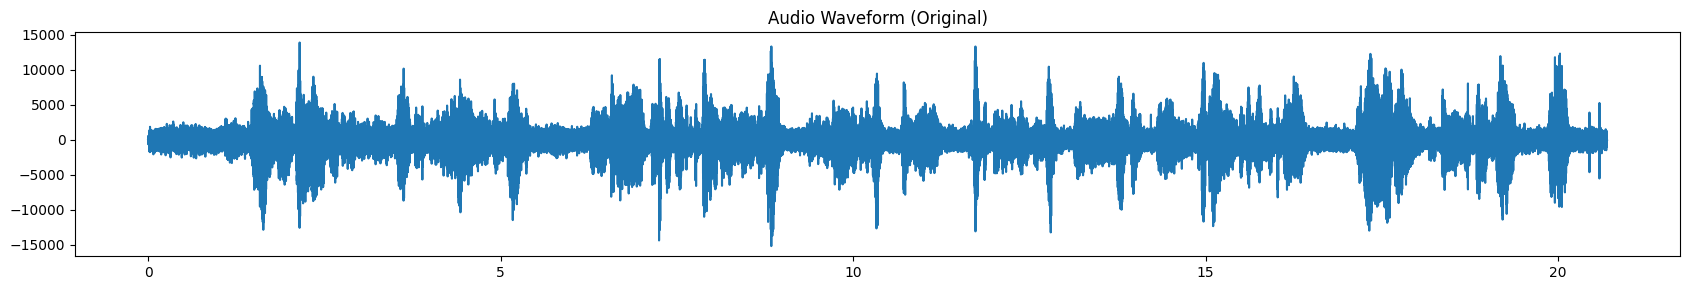

In [69]:
from scipy.signal import butter, filtfilt

file_path = os.path.join(os.getcwd(), 'attachment', 'sample_filter.wav')

with wave.open(file_path, "r") as file:
    sample_width = file.getsampwidth()
    n_channels = file.getnchannels()
    sampling_rates = file.getframerate()
    num_frames = file.getnframes()
    audio_content = file.readframes(num_frames)
    audio_data = np.frombuffer(audio_content, dtype=np.int16)

print(sampling_rates)
print(n_channels)
print(num_frames)

time_axis = np.linspace(0, num_frames / sampling_rates, num_frames)

plt.figure(figsize=(17, 3))
plt.plot(time_axis, audio_data)
plt.title('Audio Waveform (Original)')
plt.tight_layout()
plt.show()

## Let's setup some Visualization for Spectrum Freq Plot

Disini kita menggunakan FFT (Fast Fourier Transform) untuk mendapatkan nilai dari frekuensi dan menggunakan matplot lib untuk plotting frekuensi dan magnitude (mirip seperti dengan spectogram)

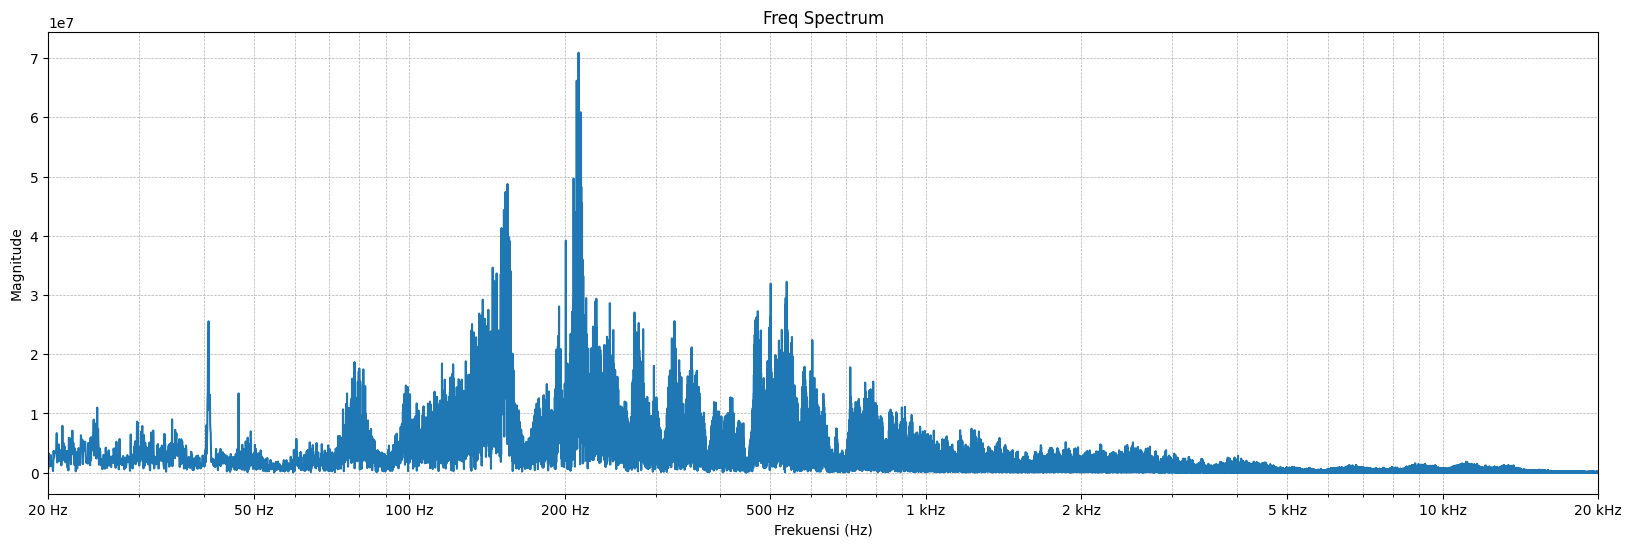

In [70]:
def plot_frequency_spectrum(data, framerate, title):
    fft_data = np.fft.fft(data)
    frequencies = np.fft.fftfreq(len(fft_data), 1 / framerate)
    
    positive_frequencies = frequencies[:len(frequencies) // 2]
    magnitude = np.abs(fft_data[:len(frequencies) // 2])
    
    plt.figure(figsize=(20, 6))
    plt.plot(positive_frequencies, magnitude)
    plt.xscale('log')
    plt.xlim(20, 20000)  # Rentang frekuensi yang relevan untuk audio
    plt.xticks([20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000], 
               ['20 Hz', '50 Hz', '100 Hz', '200 Hz', '500 Hz', '1 kHz', '2 kHz', '5 kHz', '10 kHz', '20 kHz'])
    plt.title(title)
    plt.xlabel('Frekuensi (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

plot_frequency_spectrum(audio_data, sampling_rates, "Freq Spectrum")

## Mennentukan Frequencies Spectrum

Disini karena kita menggunakan Bandpass, kita perlu menentuka frekuensi pada rentang atas dan rentang bawah lalu melaukan proses filtering

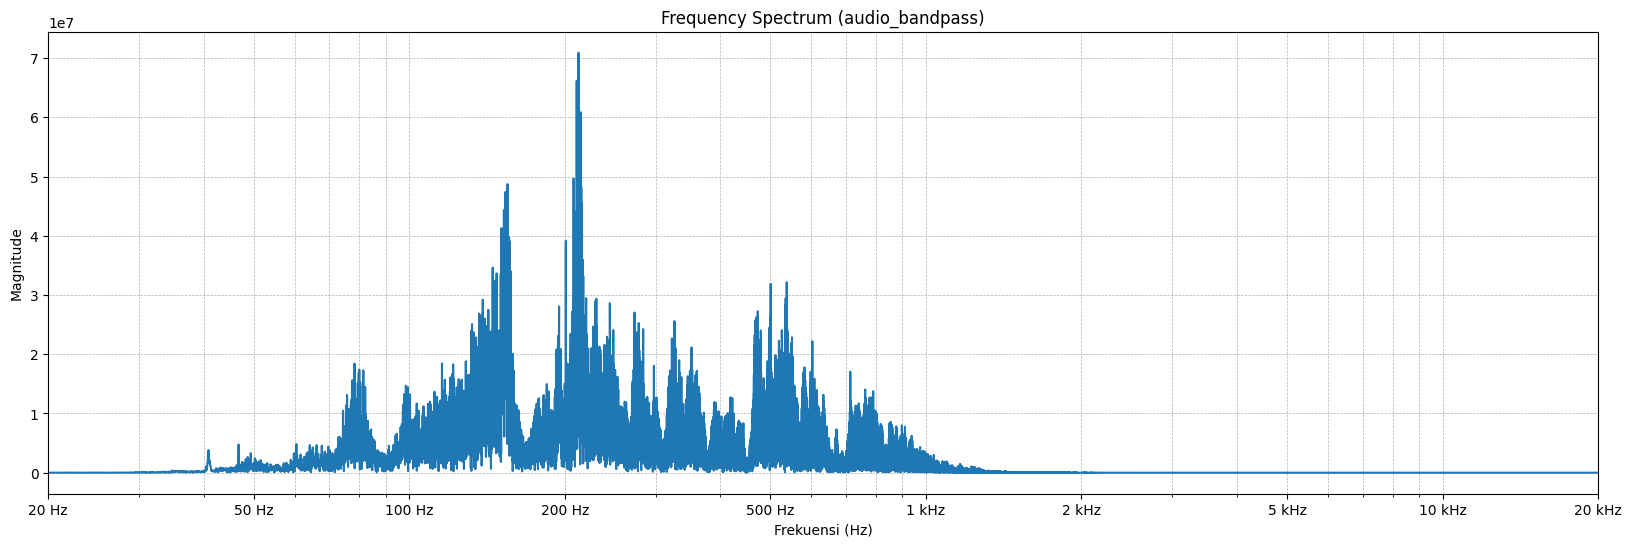

In [71]:
cutoff_low = 50
cutoff_high = 1000
order = 4 ## Orders of Slope of Attenuation

cutoff_low_nyquist = cutoff_low / (frame_rate / 2)
cutoff_high_nyquist = cutoff_high / (frame_rate / 2)
b,a = butter(order, [cutoff_low_nyquist, cutoff_high_nyquist], btype='band')
filter_bandpass = filtfilt(b, a, audio_data)
filter_bandpass = filter_bandpass.astype(np.int16)

plot_frequency_spectrum(filter_bandpass, sampling_rates, 'Frequency Spectrum (audio_bandpass)')


## Hear the Audio Then

Kita lihat bagaimana filtering dapat mengurangi suara noise (kipas) pada audio.


In [72]:
save_path = os.path.join(os.getcwd(), 'attachment', 'updated_sample_filter.wav')

with wave.open(save_path, 'w') as wav_file:
    wav_file.setnchannels(n_channels)
    wav_file.setsampwidth(sample_width)
    wav_file.setframerate(sampling_rates)
    wav_file.writeframes(filter_bandpass.tobytes())

## Making a Noise gate

Noise gate adalah sebuah metode dalam audio dimana audio bekerja dengan mengurangi atau mematikan sinyal di bawah ambang batas volume tertentu, sehingga hanya sinyal yang lebih keras yang dapat melewatinya


In [73]:
file_path = os.path.join(os.getcwd(), 'attachment', 'sample_filter.wav')

with wave.open(file_path, "r") as file:
    params = file.getparams()
    sample_width = file.getsampwidth()
    n_channels = file.getnchannels()
    sampling_rates = file.getframerate()
    num_frames = file.getnframes()
    audio_content = file.readframes(num_frames)
    audio_data = np.frombuffer(audio_content, dtype=np.int16)

print(sampling_rates)
print(n_channels)
print(num_frames)

44100
1
912576


In [74]:
    
attack_ms = 10 ## Time duration to speak
release_ms = 69 ## Because nice number
threshold = 1200

# Calculate the attack and release in terms of samples
attack_samples = int(sample_rate * attack_ms / 1000)
release_samples = int(sample_rate * release_ms / 1000)

# Apply noise gate to each sample
output_data = audio_data.copy()
envelope = 0  # for smoothing attack/release

for i in range(len(audio_data)):
    sample = abs(audio_data[i])

    if sample >= threshold:
        envelope = attack_samples  # open the gate (apply the attack time)
    else:
        envelope -= 1  # close the gate gradually based on release time
    
    if envelope <= 0:  # gate is closed, mute the sample
        output_data[i] = 0

save_path = os.path.join(os.getcwd(), 'attachment', 'output_noise_gate.wav')

# Save the output WAV file
with wave.open(save_path, 'wb') as wav_out:
    wav_out.setparams(params)  # Use the same parameters as input
    wav_out.writeframes(output_data.tobytes())

## Notes
Sepertinya, bunyi noise dari audio dan suara percakapan saya terletak pada level yang sama (meskipun pada proses recording, suara noise sudah cukup dekat dengan microphone).

Tapi secara general, filter band-pass bekerja dengan cara membuat sebuah batas bawah dan batas atas (dimana frekuensi pada batas bawah tidak bisa masuk dan sebaliknya)

Disisi lain, Noise gate bekerja dengan cara membuat sebuah threshold dalam amplitudo dimana ketika sebuah samplitudo lebih besar dari threshold ini, maka akan dibuka sebuah suara yang dapat didengar dan jika amplitudo lebih kecil dari pada thereshold, maka suara akan ditutup dan terdengar seperi suara yang senyap

[Ref](https://chatgpt.com/share/66ffc68a-e83c-800c-b083-0735ebf2ac39)

## End of the Hands-on
![image.png](https://i.imgflip.com/94932m.jpg)

Mungkin sekian dulu analisis Hands-on saya kali ini, penjelasan saya tidak sempurna (pasti), dan saya harap mungkin bisa memberikan kepada saya penjelasan / koreksi jikalau terdapat kesalahan pada Hands-on ini. 

Sekian terimkasih, Слава Богу, все закочилось